# **What and Where are the World's Oldest Businesses**

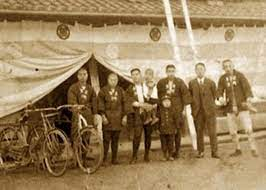

An important part of business is planning for the future and ensuring that the business survives changing market conditions. Some businesses do this remarkably well and last for hundreds of years. In this project, you'll explore data from BusinessFinancing.co.uk on the world's oldest businesses: when were they founded, and which industries do they belong to?

Like many business problems, the data we'll explore is contained in several different datasets. In order to understand the world's oldest businesses, we will first need to use joining techniques to merge our data. From there, we can use manipulation tools such as grouping and filtering to answer questions about these historic businesses.

**CATEGORIES**

>  **<u>column                      type                  meaning</u>** 
> 
> <span style="background-color: rgba(127, 127, 127, 0.1);">category_code&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;varchar&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;Code for the category of the business</span>
> 
> <span style="background-color: rgba(127, 127, 127, 0.1);">category&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;varchar&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;Description of the business category</span>

**COUNTRIES**

>  **<u>column                      type                  meaning</u>** 
> 
> <span style="background-color: rgba(127, 127, 127, 0.1);">country_code&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; varchar&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;ISO 3166-1 3-letter country code</span>
> 
> <span style="background-color: rgba(127, 127, 127, 0.1);">country&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; varchar&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;Name of the country</span>
> 
> <span style="background-color: rgba(127, 127, 127, 0.1);">continent&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;varchar&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;Name of the continent that the country exists in.</span>

**BUSINESSES**

>  **<u>column                      type                  meaning</u>** 
> 
> <span style="background-color: rgba(127, 127, 127, 0.1);">business&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; varchar&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;ISO 3166-1 3-letter country code</span>
> 
> <span style="background-color: rgba(127, 127, 127, 0.1);">year_founded&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; int&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Year the business was founded</span>
> 
> <span style="background-color: rgba(127, 127, 127, 0.1);">category_code&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; varchar&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;Code for the category of the business</span>
> 
> <span style="background-color: rgba(127, 127, 127, 0.1);">country_code&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; char&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; ISO 3166-1 3-letter country code</span>

# **SUMMARY OF QUESTIONS AND TASKS**

- Task 1: Joining All Tables for Dataset Overview
- Task 2: investigating Missing Data and Range of Data Points
- Task 3: How Many and Which Businesses Were Found Before 1000?
- Task 4: Which Are the Oldest Businesses in Each Continent?
- Task 5:
- Task 6:

## **<u>TASK 1: JOINING ALL TABLES FOR DATASET OVERVIEW</u>**

Since the database is splitted into 3 tables, it is key to have a clear overview of the relevant fields and records and to learn how they interact and give context to each other.

In [48]:
/* I decided to insert "TOP #" to reduce the redudancy of generated
records only for the sake of this project showcase. */
SELECT TOP 5 business, year_founded, category, country, continent
FROM businesses b
    JOIN categories c1 ON b.category_code = c1.category_code
    JOIN countries c2 ON b.country_code = c2.country_code

(5 rows affected)

Total execution time: 00:00:00.025

business,year_founded,category,country,continent
1st National Bank of St Lucia,1938,Banking & Finance,Saint Lucia,North America
Affligem Brewery,1074,"Distillers, Vintners, & Breweries",Belgium,Europe
Air Burkina,1967,Aviation & Transport,Burkina Faso,Africa
Air Madagascar,1962,Aviation & Transport,Madagascar,Africa
Air Seychelles,1977,Aviation & Transport,Seychelles,Asia


**COMMENTS ON THE RESULT:** The dataset seems pretty clean and consistent with the fields making noticable sense when compiled together.

## **<u>TASK 2: INVESTIGATING MISSING DATA AND RANGE OF DATA POINTS</u>**

### **Subtask 2-1: Checking for null values.**

In [42]:
SELECT -- Below it's a logic expression to count the number of null values in each column.
    SUM(case when business is null then 1 else 0 end) AS business, 
    SUM(case when year_founded is null then 1 else 0 end) AS year_founded, 
    SUM(case when b.country_code is null then 1 else 0 end) AS country_code,
    SUM(case when country is null then 1 else 0 end) AS country,
    SUM(case when continent is null then 1 else 0 end) AS continent,
    SUM(case when b.category_code is null then 1 else 0 end) AS category_code,
    SUM(case when category is null then 1 else 0 end) AS category
FROM businesses b
    LEFT JOIN categories c1 ON b.category_code = c1.category_code
        LEFT JOIN countries c2  ON b.country_code = c2.country_code

(1 row affected)

Total execution time: 00:00:00.065

business,year_founded,country_code,country,continent,category_code,category
0,0,0,0,0,0,0


### **Subtask 2-2: Calculating summary statistics.**

To calculate the extreme points of the YEAR\_FOUNDED field I will be applying a SELF-JOIN to enable me to make calculations and obtain different results from the same column.

In [41]:
SELECT MIN(b1.year_founded) AS minimum,
       MAX(b2.year_founded) AS maximum,
       AVG(b3.year_founded) AS median,
       ROUND(STDEVP(b4.year_founded),2) AS standard_deviation
FROM businesses b1
    JOIN businesses b2 ON b1.business = b2.business -- (SELF-JOIN 1 for calculating the maximum value)
    JOIN businesses b3 ON b2.business = b3.business -- (SELF-JOIN 2 for median value)
    JOIN businesses b4 ON b3.business = b4.business -- (SELF-JOIN 3 for standard deviation)

(1 row affected)

Total execution time: 00:00:00.011

minimum,maximum,median,standard_deviation
578,1999,1775,275.86


**COMMENTS ON THE RESULT:** It seems that there is a high variation of founding years between countries. In one country, the oldest business was only founded in 1999. By contrast, the oldest business in the world was founded back in 578. That's pretty incredible that a business has survived for more than a millennium. However, with a median standing at the top of the data range and a standard deviation suggesting that the data is spread out, I decided to push further using an Azure extension called SandDance to help me visualise the data points distribution. And as one can notice below, the majority of the oldest businesses per country do not hold a resilience longer than 200 years, making countries in continent such as Europe look as a role model for long-standing business.

![Data Distribution](https://i.ibb.co/gMRFfzp/year-distribution.jpg)

## **<u>TASK 3: HOW MANY AND WHICH BUSINESSES WERE FOUNDED BEFORE 1000?</u>**

Now that we got a notion of the data we are working with, let's investigate further into the oldest businesses in the world to look for some interesting patterns.

In [43]:
SELECT b.business, b.year_founded, c2.country, c1.category
FROM businesses b
    JOIN categories c1 ON b.category_code = c1.category_code
    JOIN countries c2 ON b.country_code = c2.country_code
WHERE b.year_founded < 1000
ORDER BY b.year_founded;

(6 rows affected)

Total execution time: 00:00:00.025

business,year_founded,country,category
Kongo Gumi,578,Japan,Construction
St. Peter Stifts Kulinarium,803,Austria,"Cafés, Restaurants & Bars"
Staffelter Hof Winery,862,Germany,"Distillers, Vintners, & Breweries"
Monnaie de Paris,864,France,Manufacturing & Production
The Royal Mint,886,United Kingdom,Manufacturing & Production
Sean's Bar,900,Ireland,"Cafés, Restaurants & Bars"


**COMMENT ON THE RESULT:** With that extra detail about the oldest businesses, we can see that Kongō Gumi is a construction company and the oldest continuously operating company in the world. Founded in Japan a mere century after the fall of the Roman Empire, it survived extreme changes in Japan’s culture, government and economy, preserving traditional construction techniques and family values for over 1,400 years. Additionally, in that list of six businesses, we also see a café, a winery, and a bar. And the two companies recorded as "Manufacturing and Production" are both mints, that is, they produce currency.

## **<u>TASK 4: WHICH ARE THE OLDEST COMPANIES IN EACH CONTINENT?</u>**

In [56]:
SELECT continent, country, category, year_founded, business
FROM businesses b
    JOIN countries c1  ON b.country_code = c1.country_code
    JOIN categories c2 ON b.category_code = c2.category_code
WHERE year_founded IN -- SUBQUERY 1 [START]
                    (SELECT MIN(year_founded)
                     FROM -- subquery 2 [start]
                        (SELECT continent, business, year_founded
                         FROM businesses b JOIN countries c
                         ON b.country_code = c.country_code) AS subquery
                          -- subquery 2 [end]
                     GROUP BY continent)
                      -- SUBQUERY 1 [END]
ORDER BY year_founded;

(6 rows affected)

Total execution time: 00:00:00.037

continent,country,category,year_founded,business
Asia,Japan,Construction,578,Kongo Gumi
Europe,Austria,"Cafés, Restaurants & Bars",803,St. Peter Stifts Kulinarium
North America,Mexico,Manufacturing & Production,1534,La Casa de Moneda de México
South America,Peru,Banking & Finance,1565,Casa Nacional de Moneda
Africa,Mauritius,Postal Service,1772,Mauritius Post
Oceania,Australia,Postal Service,1809,Australia Post


**COMMENT ON THE RESULT:** It is interesting to observe the oldest business in Africa seems very young when compared to its continent counterparts, specially when considering the long history it holds in the human civilisation. This suggests that business resilience in the continent started to build up only after the first industrial revolution in 1760.

## **<u>TASK 5: CATEGORIES SECTION</u>**

In [49]:
SELECT TOP 5 category, COUNT(business) AS n, AVG(year_founded) AS avg_year
FROM categories c
    JOIN businesses b
    ON c.category_code = b.category_code
GROUP BY category
ORDER BY n DESC

(5 rows affected)

Total execution time: 00:00:00.010

category,n,avg_year
Banking & Finance,37,1900
"Distillers, Vintners, & Breweries",22,1695
Aviation & Transport,19,1926
Postal Service,16,1819
Manufacturing & Production,15,1456


### **Q?) Which are the most common categories for the oldest businesses on each continent?**

Having businesses joined to categories and countries together means we can ask questions about both these things together.

In [ ]:
SELECT continent, category, COUNT(business) AS n
FROM businesses b
    JOIN countries c1  ON b.country_code = c1.country_code
    JOIN categories c2 ON b.category_code = c2.category_code
GROUP BY continent, category
HAVING COUNT(business) IN -- SUBQUERY 1 [START]
                    (SELECT MIN(year_founded)
                     FROM -- subquery 2 [start]
                        (SELECT continent, business, year_founded
                         FROM businesses b JOIN countries c
                         ON b.country_code = c.country_code) AS subquery
                          -- subquery 2 [end]
                     GROUP BY continent)
                      -- SUBQUERY 1 [END]
ORDER BY year_founded;

In [55]:
SELECT continent, category, COUNT(business) AS n
FROM businesses b
    JOIN categories c1
    ON b.category_code = c1.category_code
        JOIN countries c2
        ON b.country_code = c2.country_code
GROUP BY continent, category
HAVING COUNT(business) > 5
ORDER BY n DESC

(7 rows affected)

Total execution time: 00:00:00.008

continent,category,n
Africa,Banking & Finance,17
Europe,"Distillers, Vintners, & Breweries",12
Africa,Aviation & Transport,10
Africa,Postal Service,9
Europe,Manufacturing & Production,8
Asia,Aviation & Transport,7
Asia,Banking & Finance,6


In [3]:
SELECT TOP 10 business, category, year_founded
FROM businesses b
    JOIN categories c
    ON b.category_code = c.category_code
WHERE country_code IN
              (SELECT country_code FROM countries
               WHERE continent = 'Europe' OR continent = 'North America')
ORDER BY year_founded   

(10 rows affected)

Total execution time: 00:00:00.013

business,category,year_founded
St. Peter Stifts Kulinarium,"Cafés, Restaurants & Bars",803
Staffelter Hof Winery,"Distillers, Vintners, & Breweries",862
Monnaie de Paris,Manufacturing & Production,864
The Royal Mint,Manufacturing & Production,886
Sean's Bar,"Cafés, Restaurants & Bars",900
Marinelli Bell Foundry,Manufacturing & Production,1040
Affligem Brewery,"Distillers, Vintners, & Breweries",1074
Munke Mølle,Manufacturing & Production,1135
Casa de Ganaderos,Agriculture,1218
Gasthof Sternen,Tourism & Hotels,1230


In [1]:
SELECT  continent, category, COUNT(business) AS n
FROM businesses b
    JOIN categories c1
    ON b.category_code = c1.category_code
        JOIN countries c2
        ON b.country_code = c2.country_code
GROUP BY continent, category
HAVING COUNT(business) > 5
ORDER BY n DESC

(7 rows affected)

Total execution time: 00:00:00.103

continent,category,n
Africa,Banking & Finance,17
Europe,"Distillers, Vintners, & Breweries",12
Africa,Aviation & Transport,10
Africa,Postal Service,9
Europe,Manufacturing & Production,8
Asia,Aviation & Transport,7
Asia,Banking & Finance,6


hi

  ![title](.\datasets\visual1.jpg)

In [3]:
SELECT country, category, business, year_founded
FROM businesses b
    JOIN categories c1
    ON b.category_code = c1.category_code
        JOIN countries c2
        ON b.country_code = c2.country_code
WHERE continent = 'Asia'
ORDER BY year_founded

(42 rows affected)

Total execution time: 00:00:00.020

country,category,business,year_founded
Japan,Construction,Kongo Gumi,578
China,"Cafés, Restaurants & Bars",Ma Yu Ching's Bucket Chicken House,1153
Turkey,Tourism & Hotels,Çemberlitas Hamami,1584
India,Manufacturing & Production,Wadia Group,1736
Malaysia,Postal Service,Pos Malaysia,1800
Indonesia,Defense,Pindad,1808
Singapore,Postal Service,Singapore Post,1819
Bangladesh,Food & Beverages,M. M. Ispahani Limited,1820
Lebanon,Banking & Finance,Bank Audi,1830
Sri Lanka,Food & Beverages,George Steuart Group,1835


In [79]:
SELECT business, continent, category, year_founded
FROM businesses b
    JOIN categories c1
    ON b.category_code = c1.category_code
        JOIN countries c2
        ON b.country_code = c2.country_code
WHERE category = 'Banking & Finance'
AND business NOT LIKE '%Bank%'
ORDER BY year_founded

(7 rows affected)

Total execution time: 00:00:00.034

business,continent,category,year_founded
Casa Nacional de Moneda,South America,Banking & Finance,1565
Banco Nacional de Bolivia,South America,Banking & Finance,1871
HSBC El Salvador,North America,Banking & Finance,1891
Standard Chartered Zimbabwe,Africa,Banking & Finance,1892
KCB Group Limited,Africa,Banking & Finance,1896
Banque Internationale pour la Centrafrique,Africa,Banking & Finance,1946
European Trust Company,Oceania,Banking & Finance,1991
